In this notebook, I find the best line-of-fit over the mean of each color instead of over the entire dataset like in the old notebook. This improves the chi-squared value significantly

In [ ]:
import pandas as pd
import numpy as np
from scipy.constants import c
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [ ]:
# Load the data
file_path = '/mnt/PHYS 3310 Experiment 1 Cleaned Datasheet - Sheet1.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head(9)

,Material,Order (n),Color,Angle (deg θ),Minute,Total degrees (θ),delta(θ),sin(θ),λ
0,hydrogen,NaN,pink (lamp),174.0,0.0,174.000000,0.000000,0.000000,NaN
1,hydrogen,1,violet,160.0,7.0,160.116667,13.883333,0.239946,399.909437
2,hydrogen,1,blue,159.0,16.0,159.266667,14.733333,0.254321,423.867725
3,hydrogen,1,cyan,157.0,13.0,157.216667,16.783333,0.288753,481.255520
4,hydrogen,1,red,151.0,10.0,151.166667,22.833333,0.388052,646.753065
5,hydrogen,2,violet,145.0,23.0,145.383333,28.616667,0.478947,399.122694
6,hydrogen,2,blue,143.0,30.0,143.500000,30.500000,0.507538,422.948636
7,hydrogen,2,cyan,138.0,12.0,138.200000,35.800000,0.584958,487.464729
8,hydrogen,3,blue,124.0,15.0,124.250000,49.750000,0.763232,424.018039


In [ ]:
# Map the color to the n_2 value
color_to_n2 = {
    'red': 3,
    'cyan': 4,
    'blue': 5,
    'violet': 6,
    'ultraviolet': 7  # Assuming 'pink (lamp)' is not a part of the data we need
}

In [ ]:
# Split the data into two datasets
first_dataset = data.iloc[:42].copy()  # Rows up to 43
second_dataset = data.iloc[43:64].copy()  # Rows from 44 onwards

In [ ]:
first_dataset.head(9)

,Material,Order (n),Color,Angle (deg θ),Minute,Total degrees (θ),delta(θ),sin(θ),λ
0,hydrogen,NaN,pink (lamp),174.0,0.0,174.000000,0.000000,0.000000,NaN
1,hydrogen,1,violet,160.0,7.0,160.116667,13.883333,0.239946,399.909437
2,hydrogen,1,blue,159.0,16.0,159.266667,14.733333,0.254321,423.867725
3,hydrogen,1,cyan,157.0,13.0,157.216667,16.783333,0.288753,481.255520
4,hydrogen,1,red,151.0,10.0,151.166667,22.833333,0.388052,646.753065
5,hydrogen,2,violet,145.0,23.0,145.383333,28.616667,0.478947,399.122694
6,hydrogen,2,blue,143.0,30.0,143.500000,30.500000,0.507538,422.948636
7,hydrogen,2,cyan,138.0,12.0,138.200000,35.800000,0.584958,487.464729
8,hydrogen,3,blue,124.0,15.0,124.250000,49.750000,0.763232,424.018039


In [ ]:
# Filter out rows in the first dataset that don't have a valid color or wavelength (NaNs)
first_dataset_filtered = first_dataset[first_dataset['Color'].isin(color_to_n2.keys()) & first_dataset['λ'].notna()]

# Filter out rows in the second dataset that don't have a valid color or wavelength (NaNs)
second_dataset_filtered = second_dataset[second_dataset['Color'].isin(color_to_n2.keys()) & second_dataset['λ'].notna()]

In [ ]:
second_dataset_filtered.head(50)

,Material,Order (n),Color,Angle (deg θ),Minute,Total degrees (θ),delta(θ),sin(θ),λ,n2,lambda_m,y,x,sigma_lambda,sigma_y
44,hydrogen,1,violet,162.0,4.0,162.066667,14.058333,0.242910,404.849394,6,4.048494e-07,2.470054e+06,-0.027778,3.997490e-09,24389.362102
45,hydrogen,1,blue,161.0,16.0,161.266667,14.858333,0.256430,427.383261,5,4.273833e-07,2.339820e+06,-0.040000,3.983124e-09,21806.645266
46,hydrogen,1,cyan,159.0,20.5,159.341667,16.783333,0.288753,481.255520,4,4.812555e-07,2.077898e+06,-0.062500,3.945380e-09,17034.813030
47,hydrogen,1,red,152.0,44.0,152.733333,23.391667,0.397014,661.690674,3,6.616907e-07,1.511280e+06,-0.111111,3.782228e-09,8638.486839
48,hydrogen,2,violet,146.0,1.0,146.016667,30.108333,0.501637,418.030469,6,4.180305e-07,2.392170e+06,-0.027778,1.782458e-09,10200.076408
49,hydrogen,2,blue,144.0,6.0,144.100000,32.025000,0.530289,441.907704,5,4.419077e-07,2.262916e+06,-0.040000,1.746891e-09,8945.459767
50,hydrogen,2,cyan,140.0,12.5,140.208333,35.916667,0.586608,488.839970,4,4.888400e-07,2.045659e+06,-0.062500,1.668705e-09,6983.067628
51,hydrogen,3,blue,124.0,5.0,124.083333,52.041667,0.788458,438.032371,5,4.380324e-07,2.282936e+06,-0.040000,8.449091e-10,4403.495534
52,hydrogen,2,red,123.0,16.0,123.266667,52.858333,0.797145,664.287544,3,6.642875e-07,1.505372e+06,-0.111111,1.244080e-09,2819.265304
53,hydrogen,3,cyan,114.0,2.0,114.033333,62.091667,0.883698,490.943091,4,4.909431e-07,2.036896e+06,-0.062500,6.429431e-10,2667.535627


In [ ]:
# Perform linear regression (curve_fit) using y = a*x + b
def linear_model(x, a, b):
    return a * x + b

In [ ]:
### Define constants for the error propagation
d = 1 * 1e-3 / 600  # Convert mm to m and divide by the number of lines per mm

def analyze_dataset(dataset, sigma_theta_min):
    sigma_theta_rad = (sigma_theta_min / 60) * (np.pi / 180)  # Convert minutes to radians

    # Make sure all necessary columns are numeric
    dataset['Order (n)'] = pd.to_numeric(dataset['Order (n)'])
    dataset['λ'] = pd.to_numeric(dataset['λ'])
    dataset['Color'] = dataset['Color'].astype(str)
    dataset['delta(θ)'] = pd.to_numeric(dataset['delta(θ)'])

    # Add 'n2' column to the dataset
    dataset['n2'] = dataset['Color'].map(color_to_n2)

    # Convert wavelength from nm to m and calculate y = 1/λ
    dataset['lambda_m'] = dataset['λ'] * 1e-9
    dataset['y'] = 1 / dataset['lambda_m']

    # Calculate x = -1/(n2^2)
    dataset['x'] = -1 / (dataset['n2']**2)

    # Convert angle uncertainty to wavelength uncertainty and then to y uncertainty
    dataset['sigma_lambda'] = (d * np.cos(np.radians(dataset['delta(θ)'])) * sigma_theta_rad) / dataset['Order (n)']
    dataset['sigma_y'] = dataset['sigma_lambda'] / (dataset['lambda_m']**2)

    # Initialize dictionaries to store the sum of y, sum of y^2, and count for each color
    sum_y = {}
    sum_y_squared = {}
    count_y = {}

    # Calculate the sum of y, sum of y^2, and count for each color
    for color in dataset['Color'].unique():
        color_data = dataset[dataset['Color'] == color]
        sum_y[color] = np.sum(color_data['y'])
        sum_y_squared[color] = np.sum(color_data['sigma_y']**2)  # sum of variances
        count_y[color] = len(color_data)

    # Calculate the mean of y and uncertainty in the mean of y for each color
    mean_y = {color: sum_y[color] / count_y[color] for color in sum_y}
    uncertainty_mean_y = {color: np.sqrt(sum_y_squared[color]) / count_y[color] for color in sum_y_squared}

    # Convert the dictionaries to lists maintaining the color order
    colors = list(mean_y.keys())
    mean_y_list = np.array([mean_y[color] for color in colors])
    uncertainty_mean_y_list = np.array([uncertainty_mean_y[color] for color in colors])
    x_mean_list = np.array([np.mean(dataset[dataset['Color'] == color]['x']) for color in colors])

    # Perform linear regression (curve_fit) using y = a*x + b, with the mean y for each color
    popt, pcov = curve_fit(linear_model, x_mean_list, mean_y_list, sigma=uncertainty_mean_y_list)

    # Extracting the Rydberg constant (A) and intercept (B) from the fitting parameters
    R_H, B = popt

    # Calculate 1 / (n_1)^2 and its uncertainty
    n_1_squared_inv = B / R_H
    sigma_B, sigma_R_H = np.sqrt(pcov[1, 1]), np.sqrt(pcov[0, 0])  # Uncertainties
    cov_BR_H = pcov[0, 1]  # Covariance between B and R_H

    # propagating errors using division formula
    sigma_n_1_squared_inv_squared = n_1_squared_inv**2 * (
    (sigma_B / B)**2 + (sigma_R_H / R_H)**2 - 2 * cov_BR_H / (B * R_H))
    sigma_n_1_squared_inv = np.sqrt(sigma_n_1_squared_inv_squared)

    # Calculate chi-squared for the mean y-values of each color subset
    y_model = linear_model(np.array(x_mean_list), R_H, B)
    chi_squared = np.sum(((np.array(mean_y_list) - np.array(y_model)) / np.array(uncertainty_mean_y_list))**2)

    # Calculate reduced chi-squared (goodness-of-fit)
    # Degrees of freedom is the number of mean data points minus the number of parameters
    dof = len(mean_y_list) - len(popt)
    reduced_chi_squared = chi_squared / dof

    return R_H, sigma_R_H, n_1_squared_inv, sigma_n_1_squared_inv, popt, chi_squared, reduced_chi_squared

In [ ]:
### Define constants for the error propagation
d = 1 * 1e-3 / 600  # Convert mm to m and divide by the number of lines per mm

def analyze_dataset_new(dataset, sigma_theta_min_low, sigma_theta_min_high):
    # Convert minutes to radians for both low and high uncertainties
    sigma_theta_rad_low = (sigma_theta_min_low / 60) * (np.pi / 180)
    sigma_theta_rad_high = (sigma_theta_min_high / 60) * (np.pi / 180)

    # Make sure all necessary columns are numeric
    dataset['Order (n)'] = pd.to_numeric(dataset['Order (n)'])
    dataset['λ'] = pd.to_numeric(dataset['λ'])
    dataset['Color'] = dataset['Color'].astype(str)
    dataset['delta(θ)'] = pd.to_numeric(dataset['delta(θ)'])

    # Add 'n2' column to the dataset
    dataset['n2'] = dataset['Color'].map(color_to_n2)

    # Convert wavelength from nm to m and calculate y = 1/λ
    dataset['lambda_m'] = dataset['λ'] * 1e-9
    dataset['y'] = 1 / dataset['lambda_m']

    # Calculate x = -1/(n2^2)
    dataset['x'] = -1 / (dataset['n2']**2)

    # Initialize the sigma_lambda column
    dataset['sigma_lambda'] = 0

        # Apply different uncertainty for the last three measurements
    dataset.loc[dataset.index[:-3], 'sigma_lambda'] = (d * np.cos(np.radians(dataset.loc[dataset.index[:-3], 'delta(θ)'])) * sigma_theta_rad_low) / dataset.loc[dataset.index[:-3], 'Order (n)']
    dataset.loc[dataset.index[-3:], 'sigma_lambda'] = (d * np.cos(np.radians(dataset.loc[dataset.index[-3:], 'delta(θ)'])) * sigma_theta_rad_high) / dataset.loc[dataset.index[-3:], 'Order (n)']

    dataset['sigma_y'] = dataset['sigma_lambda'] / (dataset['lambda_m']**2)

    # Initialize dictionaries to store the sum of y, sum of y^2, and count for each color
    sum_y = {}
    sum_y_squared = {}
    count_y = {}

    # Calculate the sum of y, sum of y^2, and count for each color
    for color in dataset['Color'].unique():
        color_data = dataset[dataset['Color'] == color]
        sum_y[color] = np.sum(color_data['y'])
        sum_y_squared[color] = np.sum(color_data['sigma_y']**2)  # sum of variances
        count_y[color] = len(color_data)

    # Calculate the mean of y and uncertainty in the mean of y for each color
    mean_y = {color: sum_y[color] / count_y[color] for color in sum_y}
    uncertainty_mean_y = {color: np.sqrt(sum_y_squared[color]) / count_y[color] for color in sum_y_squared}

    # Convert the dictionaries to lists maintaining the color order
    colors = list(mean_y.keys())
    mean_y_list = np.array([mean_y[color] for color in colors])
    uncertainty_mean_y_list = np.array([uncertainty_mean_y[color] for color in colors])
    x_mean_list = np.array([np.mean(dataset[dataset['Color'] == color]['x']) for color in colors])

    # Perform linear regression (curve_fit) using y = a*x + b, with the mean y for each color
    popt, pcov = curve_fit(linear_model, x_mean_list, mean_y_list, sigma=uncertainty_mean_y_list)

    # Extracting the Rydberg constant (A) and intercept (B) from the fitting parameters
    R_H, B = popt

    # Calculate 1 / (n_1)^2 and its uncertainty
    n_1_squared_inv = B / R_H
    sigma_B, sigma_R_H = np.sqrt(pcov[1, 1]), np.sqrt(pcov[0, 0])  # Uncertainties
    cov_BR_H = pcov[0, 1]  # Covariance between B and R_H

    # propagating errors using division formula
    sigma_n_1_squared_inv_squared = n_1_squared_inv**2 * (
    (sigma_B / B)**2 + (sigma_R_H / R_H)**2 - 2 * cov_BR_H / (B * R_H))
    sigma_n_1_squared_inv = np.sqrt(sigma_n_1_squared_inv_squared)

    # Calculate chi-squared for the mean y-values of each color subset
    y_model = linear_model(np.array(x_mean_list), R_H, B)
    chi_squared = np.sum(((np.array(mean_y_list) - np.array(y_model)) / np.array(uncertainty_mean_y_list))**2)

    # Calculate reduced chi-squared (goodness-of-fit)
    # Degrees of freedom is the number of mean data points minus the number of parameters
    dof = len(mean_y_list) - len(popt)
    reduced_chi_squared = chi_squared / dof

    return R_H, sigma_R_H, n_1_squared_inv, sigma_n_1_squared_inv, popt, chi_squared, reduced_chi_squared

In [ ]:
# Create copies of the filtered datasets to avoid SettingWithCopyWarning
first_dataset_filtered = first_dataset_filtered.copy()
second_dataset_filtered = second_dataset_filtered.copy()

# Analyze the datasets
rydberg_constant_first, rydberg_constant_error_first, n_1_squared_inv_first, n_1_squared_inv_error_first, popt_first, chi_squared_first, reduced_chi_squared_first = analyze_dataset(first_dataset_filtered, 8*np.sqrt(2))
rydberg_constant_second, rydberg_constant_error_second, n_1_squared_inv_second, n_1_squared_inv_error_second, popt_second, chi_squared_second, reduced_chi_squared_second = analyze_dataset_new(second_dataset_filtered, 8.5, 0.5*np.sqrt(325))

# Output the Rydberg constants, errors, and intercepts for both datasets
print("Dataset 1: ")
print("R_H =", rydberg_constant_first, ",sigma_R_H =", rydberg_constant_error_first, ",n_1_squared_inv =", n_1_squared_inv_first, ",sigma_n_1_squared_inv =", n_1_squared_inv_error_first, ",chi_squared =", chi_squared_first, ",reduced_chi_squared =", reduced_chi_squared_first)
print("Dataset 2: ")
print("R_H =", rydberg_constant_second, ",sigma_R_H =", rydberg_constant_error_second, ",n_1_squared_inv =", n_1_squared_inv_second, ",sigma_n_1_squared_inv =", n_1_squared_inv_error_second, ",chi_squared =", chi_squared_second, ",reduced_chi_squared =", reduced_chi_squared_second)

Dataset 1: 
R_H = 10981152.804632157 ,sigma_R_H = 67939.08715025637 ,n_1_squared_inv = 0.2503604249445335 ,sigma_n_1_squared_inv = 0.0010678822140984315 ,chi_squared = 1.889958095199286 ,reduced_chi_squared = 0.944979047599643
Dataset 2: 
R_H = 10754872.173444118 ,sigma_R_H = 247503.23679325896 ,n_1_squared_inv = 0.24850309731767492 ,sigma_n_1_squared_inv = 0.003946026448231881 ,chi_squared = 25.73838234550253 ,reduced_chi_squared = 12.869191172751265


In [ ]:
def plot_dataset(dataset, title, popt):
    # Unique colors for the plot and color mapping
    unique_colors = dataset['Color'].unique()
    color_mapping = {
        'red': 'red',
        'cyan': 'cyan',
        'blue': 'blue',
        'violet': 'purple',
        'ultraviolet': 'magenta'  # Assuming ultraviolet to be magenta
    }

    # Initialize a figure
    plt.figure(figsize=(10, 6))

    # Plot all data points with corresponding color in a lighter shade or smaller size
    for color in unique_colors:
        subset = dataset[dataset['Color'] == color]
        plt.scatter(subset['x'], subset['y'], label=color.capitalize() + " data",
                    color=color_mapping[color], alpha=0.5, s=10)

    # Calculate the mean y and x values along with their uncertainties for plotting
    mean_y = {}
    uncertainty_mean_y = {}
    x_mean = {}
    for color in unique_colors:
        color_data = dataset[dataset['Color'] == color]
        mean_y[color] = np.mean(color_data['y'])
        uncertainty_mean_y[color] = np.sqrt(np.sum(color_data['sigma_y']**2)) / len(color_data)
        x_mean[color] = np.mean(color_data['x'])

        # Plot the mean points with a star marker and error bars
        plt.errorbar(x_mean[color], mean_y[color], yerr=uncertainty_mean_y[color], fmt='*',
                    color=color_mapping[color], label=color.capitalize() + " mean", capsize=5)

    # Generate x values for the fit line based on the mean x values from each color subset
    fit_x_values = np.array(list(x_mean.values()))
    # Generate the fit line based on the linear model and fitting parameters from the regression of the means
    fit_line = linear_model(fit_x_values, *popt)
    # Plot the best fit line
    plt.plot(fit_x_values, fit_line, color='black', label='Best fit line')

    # Labeling the plot
    plt.xlabel('x = -1/$(n_2)^2$')
    plt.ylabel('y = 1/λ (m$^{-1}$)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

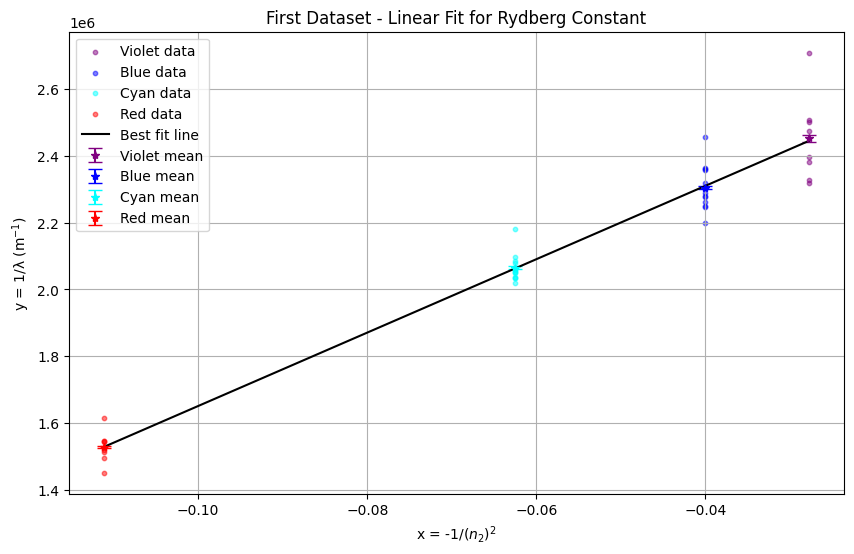

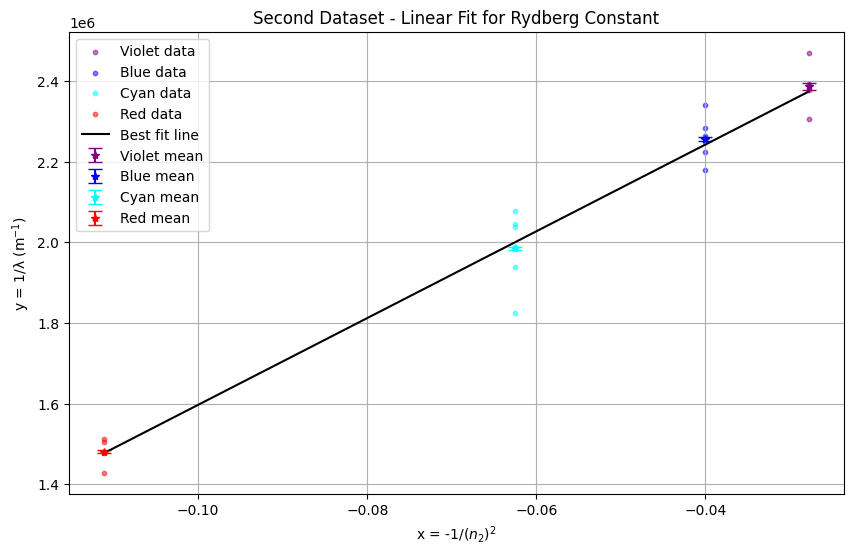

In [ ]:
# Plot the first dataset with error bars
plot_dataset(first_dataset_filtered, 'First Dataset - Linear Fit for Rydberg Constant', popt_first)

# Plot the second dataset with errors bars
plot_dataset(second_dataset_filtered, 'Second Dataset - Linear Fit for Rydberg Constant', popt_second)